In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import string
import json

In [76]:
raw_data = pd.read_csv("./home_security_multi_intent.csv")[["phrase", "intents"]]

In [77]:
raw_data["phrase"]

0       Hi [NAME_1] - we just went under contract w ou...
1       Hi [NAME_1], sorry works been crazy. How much ...
2       The quote we received from Vivint was twice as...
3       I would love to have all this automation and v...
4       Can we please discuss this with me later today...
                              ...                        
1743    Hi [NAME_1] I decided to go with a different p...
1744    I think [NAME_1] may have given you a wrong nu...
1745    [NAME_1] was at my house last week went throug...
1746    I already purchased another home monitoring sy...
1747    I currently have a contract with [ORGANIZATION...
Name: phrase, Length: 1748, dtype: object

In [78]:
def processing_data(raw_data):
    special_char = '\@_!-#$%^&*()<>?/.\|}{~:;[],"\"'
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    raw_utterance = [i.lower() for i in raw_data["phrase"]]
    raw_utterance1 = []

    for utt in raw_utterance:
        new_utt = ''.join((filter(lambda i: i not in special_char, utt)))
        new_utt = re.sub("[\n]"," ", new_utt)
        new_utt = re.sub(emoji_pattern, "", new_utt)
        new_utt = re.sub("[ ]+", " " , new_utt)
        raw_utterance1.append(new_utt)
    return raw_utterance1

In [80]:
raw_data["phrase"] = processing_data(raw_data)

In [38]:
def processing_label(raw_data):
    raw_intent = [i for i in raw_data["intents"]]
    intent_list = []
    chars = re.escape(string.punctuation)
    for sample_intent in raw_intent:
        sample_intent1 = ["_".join(re.sub(r'['+chars+']', " ", i).strip().split(" ")[1:]) 
                          for i in sample_intent.split(",")]
        intent_list.append(sample_intent1)

    return intent_list

In [8]:
with open('processed_utterance.json', 'w') as f:
    json.dump(raw_utterance1, f)

with open('processed_intents.json', 'w') as f:
    json.dump(intent_list, f)

In [9]:
unique = [x for x in set([j for i in intent_list for j in i])]

In [10]:
len(unique)

52

In [11]:
intent_count = {}
all_intents = [j for i in intent_list for j in i]
for i in all_intents:
    if i not in intent_count:
        intent_count[i] = 1
    else:
        intent_count[i] += 1
intent_name = []
intent_count_val = []
for i in intent_count:
    intent_name.append(i)
    intent_count_val.append(intent_count[i])
    

name_dict = {}
for i in range(len(intent_name)):
    name_dict[i] = intent_name[i]

<BarContainer object of 52 artists>

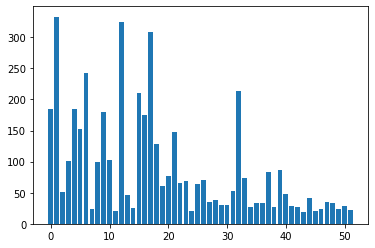

In [12]:
plt.bar(name_dict.keys(), intent_count_val)

In [14]:
from transformers import BertTokenizer

In [19]:
obj = BertTokenizer.from_pretrained("bert-base-uncased").batch_encode_plus(raw_utterance1)

In [26]:
length = []
for i in obj.input_ids:
    length.append(len(i))


In [30]:
length.sort()

In [129]:
path = "./Aktify/credit_repair_multi_intent.csv"

In [135]:
raw_data = pd.read_csv(path)[["phrase", "intents"]]

In [136]:
raw_data.head()

,phrase,intents
0,Can you call me on Monday right now I'm babysi...,"[""1.call.now"", ""0.delay.hours"", ""0.confirmatio..."
1,"I want your help, but when I'M ready!.....I g...","[""0.delay.finances"", ""0.excessive.contact"", ""0..."
2,Sorry I'm dealing with a family situation righ...,"[""0.delay.family.sick"", ""0.confirmation"", ""1.s..."
3,Last time I used you guys you charged me for a...,"[""0.credit.history"", ""2.existing.customer.issu..."
4,Will not using ur services I was told before s...,"[""2.not.interested"", ""2.dissatisfied.customer""]"


In [137]:
def processing_data(raw_data):
    
    special_char = '\@_!-#$%^&*()<>?/.\|}{~:;[],"\"'
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    raw_utterance = [i.lower() for i in raw_data["phrase"]]
    raw_utterance1 = []

    for utt in raw_utterance:
        new_utt = ''.join((filter(lambda i: i not in special_char, utt)))
        new_utt = re.sub("[\n]"," ", new_utt)
        new_utt = re.sub(emoji_pattern, "", new_utt)
        new_utt = re.sub("[ ]+", " " , new_utt)
        raw_utterance1.append(new_utt)

    raw_intent = [i for i in raw_data["intents"]]
    intent_list = []
    chars = re.escape(string.punctuation)
    for sample_intent in raw_intent:
        sample_intent1 = ["_".join(re.sub(r'['+chars+']', " ", i).strip().split(" ")[1:]) 
                          for i in sample_intent.split(",")]
        intent_list.append(sample_intent1)

    intents = [",".join(i) for i in intent_list]
    raw_data["intents"] = intents
    raw_data["phrase"] = raw_utterance1
    
    return raw_data

In [138]:
raw_data = processing_data(raw_data)

In [139]:
raw_data

,phrase,intents
0,can you call me on monday right now i'm babysi...,"call_now,delay_hours,confirmation,schedule_cal..."
1,i want your help but when i'm readyi gotta get...,"delay_finances,excessive_contact,delay_evaluat..."
2,sorry i'm dealing with a family situation righ...,"delay_family_sick,confirmation,schedule_call_d..."
3,last time i used you guys you charged me for a...,"credit_history,existing_customer_issue,not_int..."
4,will not using ur services i was told before s...,"not_interested,dissatisfied_customer"
...,...,...
4607,money1 a month only for the first month or for...,"how_does_it_work,cost_demand"
4608,i have some insurance with organization1 thank...,"dnc,courtesy_or_statement,chose_competitor,not..."
4609,hey sorry i keep missing your calls im still u...,"greeting,delay_sleeping,delay_work,apology"
4610,uhm no i don't think i'm interested at all you...,"not_interested,negation,dissatisfied_customer"


In [127]:
raw_data = raw_data.sample(frac=1).reset_index(drop=True)

In [128]:
test = raw_data.iloc[:200]

In [129]:
test.to_csv("test.csv")

In [130]:
train = raw_data.iloc[200:]

In [131]:
train.to_csv('train.csv')

In [132]:
unique = [x for x in set([j for i in raw_data["intents"] for j in i])]

In [134]:
len(sorted(unique))

67

In [135]:
train_unique = [x for x in set([j for i in train["intents"] for j in i])]

In [136]:
len(train_unique)

67

In [137]:
test_unique = [x for x in set([j for i in test["intents"] for j in i])]

In [138]:
len(test_unique)

63

In [101]:
raw_data = pd.read_table("./top-dataset-semantic-parsing/train.tsv", header = None)

In [102]:
raw_data.head()

,0,1,2
0,How long will it take to drive from Chicago to...,How long will it take to drive from Chicago to...,[IN:GET_ESTIMATED_DURATION How long will it ta...
1,Will it take shorter to get to the White House...,Will it take shorter to get to the White House...,[IN:UNSUPPORTED_NAVIGATION Will it take shorte...
2,will I make it to the beach by noon if I leave...,will I make it to the beach by noon if I leave...,[IN:GET_ESTIMATED_ARRIVAL will I make it to [S...
3,When should I leave my house to get to the Ham...,When should I leave my house to get to the Ham...,[IN:GET_ESTIMATED_DEPARTURE When should I leav...
4,I need to know if there's a lot of traffic on ...,I need to know if there 's a lot of traffic on...,[IN:GET_INFO_TRAFFIC I need to know if there '...


In [94]:
for i, j in zip(raw_data[0], raw_data[1]):
    if i != j:
        print(i)
        print(j)

Will it take shorter to get to the White House by bus or taxi?
Will it take shorter to get to the White House by bus or taxi ?
I need to know if there's a lot of traffic on my way home
I need to know if there 's a lot of traffic on my way home
how long would it take to ride a bus to jeddah from madina travelling at 8AM?
how long would it take to ride a bus to jeddah from madina travelling at 8AM ?
IS THERE TRAFFIC CONGESTION ON THE VERRAZZANO BRIDGE  ON THE WAY TO BROOKLYN
IS THERE TRAFFIC CONGESTION ON THE VERRAZZANO BRIDGE ON THE WAY TO BROOKLYN
What's the best route to take to the portland airport
What 's the best route to take to the portland airport
How is traffic heading to Dad's house
How is traffic heading to Dad 's house
Are there downed power lines on freemont ave that might make me late to the movie?
Are there downed power lines on freemont ave that might make me late to the movie ?
If I take off now what time should I arrive at Fenway Park?
If I take off now what time shoul

What 's happening in Richmond today
How are the Roads in Dallas?
How are the Roads in Dallas ?
What's happening in Nashua, NH
What 's happening in Nashua , NH
What is the quickest way to the Mayfair Arts Festival if I leave at noon?
What is the quickest way to the Mayfair Arts Festival if I leave at noon ?
Considering the snowfall, how long will it take to get to Missouri?
Considering the snowfall , how long will it take to get to Missouri ?
How much time will traffic add to my commute if I leave at 3:30pm?
How much time will traffic add to my commute if I leave at 3 : 30 pm ?
when do I need to leave here if I want to go to my uncle's house before my sister's house by noon
when do I need to leave here if I want to go to my uncle 's house before my sister 's house by noon
Are there any detours on I94 going towards downtown Chicago?
Are there any detours on I94 going towards downtown Chicago ?
I need to be in San Diego on Saturday before 12pm what route can I take avoiding traffic
I need

what time should I leave work if i want to get home at 4pm
what time should I leave work if i want to get home at 4 pm
Tell me the time from Citrus Heights, CA to Ashland, OR using I-5.
Tell me the time from Citrus Heights , CA to Ashland , OR using I - 5 .
If I leave now, will I make it to Roosevelt Field by 8:30?
If I leave now , will I make it to Roosevelt Field by 8 : 30 ?
Best hotels to sleep in during my trip?
Best hotels to sleep in during my trip ?
The dentist appointment is 2:30 p.m. in Goodlettsville, when should I leave Clarksville to make it on time?
The dentist appointment is 2 : 30 p.m . in Goodlettsville , when should I leave Clarksville to make it on time ?
Handel's Messiah show in Los Angeles
Handel 's Messiah show in Los Angeles
What kids events are on this weekend for kids in the age group of 8-10
What kids events are on this weekend for kids in the age group of 8 - 10
Is there a road construction I need to watch out for going to the kickboxing tournament?
Is there a

Any accidents ?
I want to leave my work to make it to Rochester NY by 9. Could you tell me the time that I would have to leave
I want to leave my work to make it to Rochester NY by 9 . Could you tell me the time that I would have to leave
Things to do in Buffalo, NY next week
Things to do in Buffalo , NY next week
What's the distance between Maine and new jersey
What 's the distance between Maine and new jersey
When should I leave to get to Riverside by 9 AM?
When should I leave to get to Riverside by 9 AM ?
Howdy, bot. What's your favorite restaurant in Atlanta and would we need weekend reservations
Howdy , bot . What 's your favorite restaurant in Atlanta and would we need weekend reservations
How's the traffic on Route 80
How 's the traffic on Route 80
where was the traffic accident happened on the way to my sister's home yesterday?
where was the traffic accident happened on the way to my sister 's home yesterday ?
If I leave at 4pm how long will it take me to drive to Chico?
If I l

What countries do friends my age visit?
What countries do friends my age visit ?
Are there any detours going to Teagan's school?
Are there any detours going to Teagan 's school ?
Which way is the fastest to take if I need to be at my meeting at 8am and I have to drive to downtown Syracuse?
Which way is the fastest to take if I need to be at my meeting at 8 am and I have to drive to downtown Syracuse ?
From Jessica to Mary's house what is the shortest route I could take?
From Jessica to Mary 's house what is the shortest route I could take ?
What's going on around Naperville this weekend
What 's going on around Naperville this weekend
When should I leave to beat traffic on the freeway?
When should I leave to beat traffic on the freeway ?
Are there any speed camera installed on Abbey Rise Street?
Are there any speed camera installed on Abbey Rise Street ?
How is traffic near the Cowboys vs. Eagles game in Philadelphia?
How is traffic near the Cowboys vs . Eagles game in Philadelphia ?
Ho

what's the commute
what 's the commute
Is it faster to take Interstate 59 to work with all the construction or to just take i-459 around the city
Is it faster to take Interstate 59 to work with all the construction or to just take i - 459 around the city
How many miles is it from here to Niagara Falls, Canada
How many miles is it from here to Niagara Falls , Canada
Which road should I take to avoid traffic if I want to drive downtown at 5pm?
Which road should I take to avoid traffic if I want to drive downtown at 5 pm ?
Are all roads clear from my house to Hannah's house?
Are all roads clear from my house to Hannah 's house ?
Has the snow caused there to be a delay on my route to school?
Has the snow caused there to be a delay on my route to school ?
Has Kerry return from her 2 week vacation in Spain?
Has Kerry return from her 2 week vacation in Spain ?
How many days until Thanksgiving?
How many days until Thanksgiving ?
How are the road conditions in the Dallas Metroplex?
How are the 

In [74]:
raw_data[2].iloc[0]

'[IN:GET_ESTIMATED_DURATION How long will it take to [SL:METHOD_TRAVEL drive ] from [SL:SOURCE Chicago ] to [SL:DESTINATION Mississippi ] ]'

In [75]:
import re

In [76]:
re.findall("IN:[A-Z_]+", raw_data[2].iloc[0])

['IN:GET_ESTIMATED_DURATION']

In [77]:
labels = []
for i in raw_data[2]:
    labels.extend(re.findall("IN:[A-Z\_]+", i))

In [89]:
label = sorted(list(set(labels)))
label = [ l[3:].lower() for l in label]

In [91]:
f = open(f"./vocab.txt", "w")
f.writelines([line + "\n" for line in label])  

In [98]:
def processing_data(path, csv_name):

    raw_data = pd.read_table(path, header = None)

    vocab = []
    labels = []
    for i in raw_data[2]:
        temp = re.findall("IN:[A-Z\_]+", i)
        vocab.extend(temp)
        labels.append([ l[3:].lower() for l in temp])

    data = pd.DataFrame({
        "phrase":raw_data[0],
        "intents":labels
        })

    print(f"Processing dataset{csv_name} data {len(data)}")

    vocab = sorted(list(set(vocab)))
    vocab = [ l[3:].lower() for l in vocab]

    return vocab


In [99]:
processing_data("./top-dataset-semantic-parsing/train.tsv", "train.csv")

Processing datasettrain.csv data 31279


['combine',
 'get_contact',
 'get_directions',
 'get_distance',
 'get_estimated_arrival',
 'get_estimated_departure',
 'get_estimated_duration',
 'get_event',
 'get_event_attendee',
 'get_event_attendee_amount',
 'get_event_organizer',
 'get_info_road_condition',
 'get_info_route',
 'get_info_traffic',
 'get_location',
 'get_location_home',
 'get_location_hometown',
 'get_location_school',
 'get_location_work',
 'negation',
 'unintelligible',
 'unsupported',
 'unsupported_event',
 'unsupported_navigation',
 'update_directions']

In [142]:
"atis_flight".split()

['atis_flight']

In [126]:
raw_data = pd.read_csv("./MixSNIPS_clean/train.csv")

In [100]:
from transformers import BertTokenizer

In [104]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [127]:
ids = tokenizer.batch_encode_plus(raw_data.phrase.tolist()).input_ids

In [128]:
print(max([len(i)for i in ids]))

66
